In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df = pd.read_csv('/data/customer_churn_data.csv')

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [27]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5880.000000,5880.000000,5880.000000,5880.000000
mean,0.500680,36.549150,70.157779,2566.813165
std,0.500042,20.909674,28.804615,1910.017743
min,0.000000,1.000000,20.000000,20.030000
25%,0.000000,18.000000,45.717500,1020.217500
50%,1.000000,37.000000,70.155000,2136.445000
75%,1.000000,55.000000,95.457500,3767.665000
max,1.000000,72.000000,119.990000,8589.600000


In [29]:
# Dropar a coluna Plano de Acesso
df = df.drop(columns=["customerID"])

# Exibir as primeiras linhas do DataFrame para confirmar
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [30]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Criar uma cópia do DataFrame para aplicar as transformações
df_transformed = df.copy()

# Converter todas as colunas categóricas para strings
categorical_columns = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService",
                       "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
                       "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]

df_transformed[categorical_columns] = df_transformed[categorical_columns].astype(str)

# Aplicar Label Encoding nas colunas categóricas
label_encoder = LabelEncoder()

for column in categorical_columns:
    df_transformed[column] = label_encoder.fit_transform(df_transformed[column])

# Aplicar MinMaxScaler nas colunas numéricas (exceto churn)
scaler = MinMaxScaler()
numeric_columns = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]

df_transformed[numeric_columns] = scaler.fit_transform(df_transformed[numeric_columns])

# Exibir as primeiras linhas do DataFrame transformado
df_transformed.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0.0,0,1,0.309859,0,1,2,1,1,1,1,1,1,0,1,0,0.298530,0.131456,0
1,0,0.0,1,0,0.591549,0,1,0,2,0,2,0,2,0,0,0,3,0.807081,0.502951,1
2,1,1.0,0,0,0.704225,1,0,0,0,2,2,2,0,0,1,0,2,0.773377,0.576902,1
3,1,1.0,0,0,1.000000,1,2,0,2,0,2,0,0,0,0,0,1,0.813881,0.849439,0
4,1,1.0,0,0,0.338028,1,2,0,0,0,0,2,0,2,0,0,2,0.322232,0.150004,1


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separando as features (X) e a variável target (y)
X = df_transformed.drop(columns=["Churn"])  # Features (sem a variável target)
y = df_transformed["Churn"]  # Target (churn)

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificando o tamanho dos conjuntos
print("Tamanho do conjunto de treino:", X_train.shape[0])
print("Tamanho do conjunto de teste:", X_test.shape[0])


Tamanho do conjunto de treino: 4704
Tamanho do conjunto de teste: 1176


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Instanciar o modelo de Regressão Logística
log_model = LogisticRegression(random_state=42, max_iter=1000)

# Treinando o modelo
log_model.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred_log = log_model.predict(X_test)

# Avaliando o modelo
print("Acurácia Regressão Logística:", accuracy_score(y_test, y_pred_log))
print("Relatório de Classificação Regressão Logística:\n", classification_report(y_test, y_pred_log))


Acurácia Regressão Logística: 0.49744897959183676
Relatório de Classificação Regressão Logística:
               precision    recall  f1-score   support

           0       0.50      0.60      0.55       596
           1       0.49      0.39      0.44       580

    accuracy                           0.50      1176
   macro avg       0.50      0.50      0.49      1176
weighted avg       0.50      0.50      0.49      1176



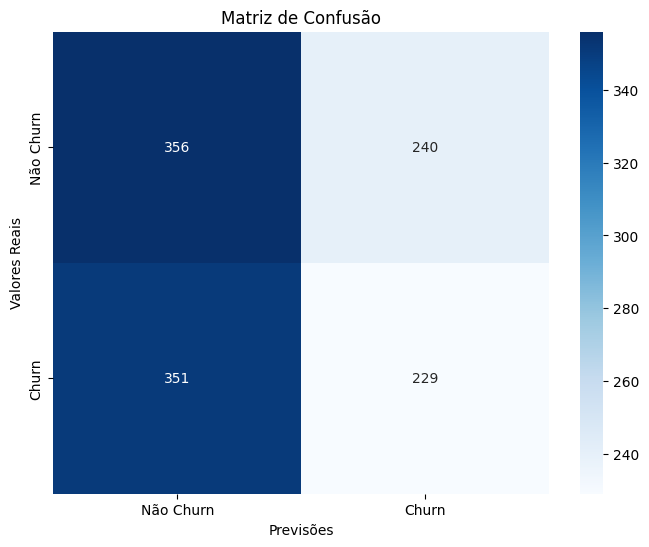

In [33]:
#import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#import seaborn as sns

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_log)

# Plotar a matriz de confusão usando seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=["Não Churn", "Churn"], yticklabels=["Não Churn", "Churn"])
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()


In [34]:
# Dividindo os dados em treinamento e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar o modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Treinando o modelo
rf_model.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred = rf_model.predict(X_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.5136054421768708
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.51      0.58      0.54       584
           1       0.52      0.45      0.48       592

    accuracy                           0.51      1176
   macro avg       0.51      0.51      0.51      1176
weighted avg       0.51      0.51      0.51      1176



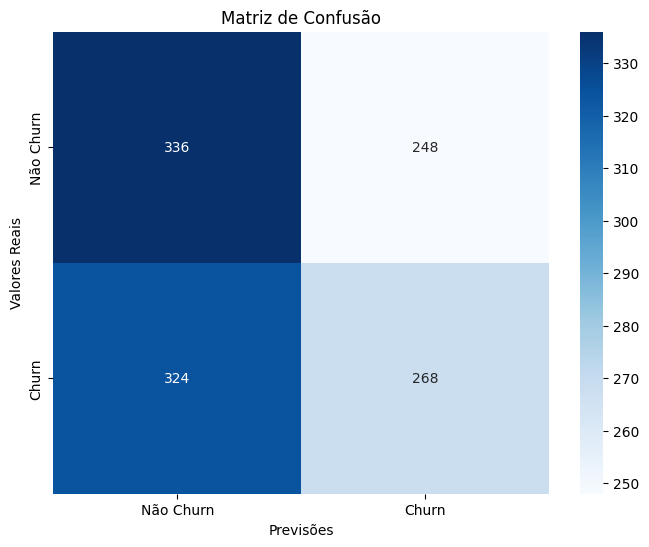

In [35]:
#import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#import seaborn as sns

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão usando seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=["Não Churn", "Churn"], yticklabels=["Não Churn", "Churn"])
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()


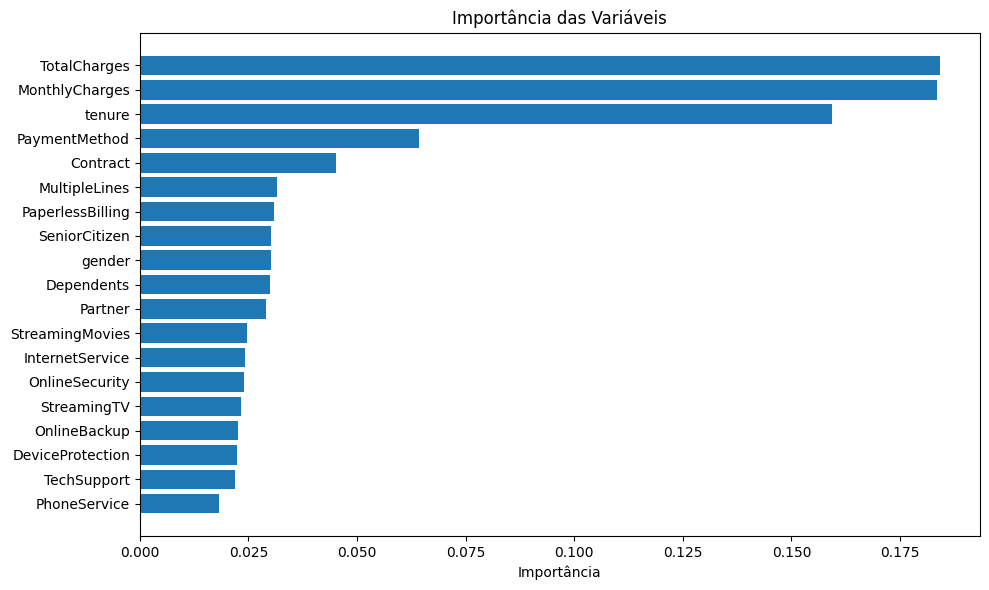

In [36]:
# Importância das Features
importances = rf_model.feature_importances_

# Ordenar as features por importância
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plotar as importâncias das variáveis como barras horizontais, em ordem decrescente
plt.figure(figsize=(10, 6))
plt.title('Importância das Variáveis')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), feature_names[indices])
plt.gca().invert_yaxis()  # Inverter o eixo Y para que as mais importantes apareçam no topo
plt.xlabel('Importância')
plt.tight_layout()
plt.show()


Melhores parâmetros Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Melhores parâmetros Regressão Logística: {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


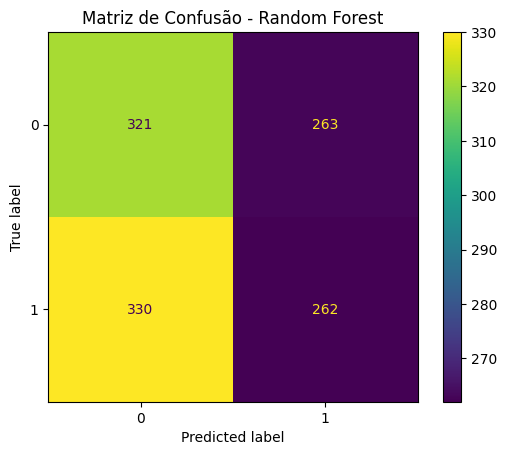

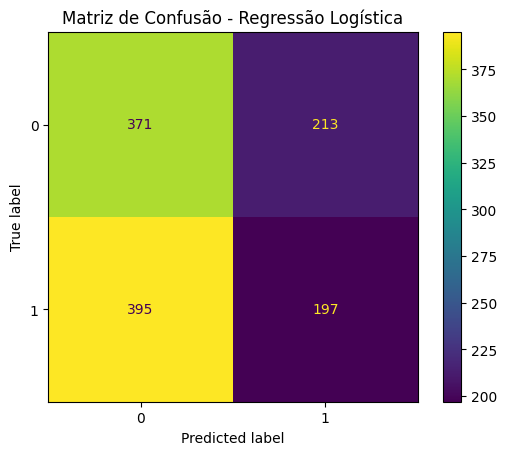

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

# Definindo o espaço de parâmetros para Random Forest e Regressão Logística
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Realizando o GridSearch para Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Obtendo os melhores parâmetros do modelo Random Forest
best_rf = grid_search_rf.best_estimator_
print("Melhores parâmetros Random Forest:", best_rf.get_params())

# Realizando o GridSearch para Regressão Logística
grid_search_lr = GridSearchCV(log_model, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Obtendo os melhores parâmetros do modelo de Regressão Logística
best_lr = grid_search_lr.best_estimator_
print("Melhores parâmetros Regressão Logística:", best_lr.get_params())

# Fazendo as previsões com os melhores modelos
y_pred_rf = best_rf.predict(X_test)
y_pred_lr = best_lr.predict(X_test)

# Exibindo a matriz de confusão para Random Forest
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# Exibindo a matriz de confusão para Regressão Logística
ConfusionMatrixDisplay.from_estimator(best_lr, X_test, y_test)
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()


In [38]:
from sklearn.metrics import accuracy_score, classification_report

# Avaliando o modelo Random Forest com os melhores parâmetros
y_pred_rf = best_rf.predict(X_test)
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação Random Forest:\n", classification_report(y_test, y_pred_rf))

# Avaliando o modelo Regressão Logística com os melhores parâmetros
y_pred_lr = best_lr.predict(X_test)
print("Acurácia Regressão Logística:", accuracy_score(y_test, y_pred_lr))
print("Relatório de Classificação Regressão Logística:\n", classification_report(y_test, y_pred_lr))


Acurácia Random Forest: 0.4957482993197279
Relatório de Classificação Random Forest:
               precision    recall  f1-score   support

           0       0.49      0.55      0.52       584
           1       0.50      0.44      0.47       592

    accuracy                           0.50      1176
   macro avg       0.50      0.50      0.49      1176
weighted avg       0.50      0.50      0.49      1176

Acurácia Regressão Logística: 0.48299319727891155
Relatório de Classificação Regressão Logística:
               precision    recall  f1-score   support

           0       0.48      0.64      0.55       584
           1       0.48      0.33      0.39       592

    accuracy                           0.48      1176
   macro avg       0.48      0.48      0.47      1176
weighted avg       0.48      0.48      0.47      1176

